In [218]:
# !!pip install opencv-python

In [219]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# (1) Preprocessing: Detect face and eyes

In [220]:
img = cv2.imread('./../images/babar_azam/320448.png')
img.shape

(320, 320, 3)

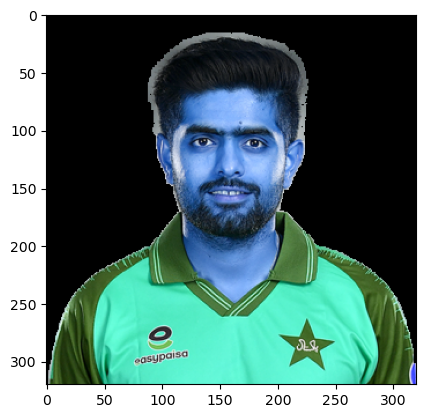

In [221]:
plt.imshow(img)

In [222]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(320, 320)

In [223]:
gray

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0, 190, ..., 125, 118, 156],
       [  0,   0, 193, ..., 120, 115, 152],
       [  0,   0, 195, ..., 138, 110, 140]], dtype=uint8)

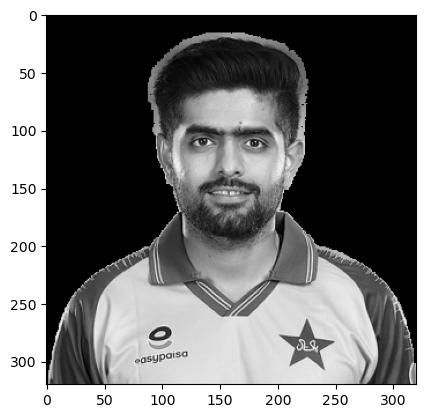

In [224]:
plt.imshow(gray, cmap='gray')

In [225]:
# pip install --upgrade opencv-python opencv-python-headless


In [226]:
face_cascade = cv2.CascadeClassifier('./../haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./../haarcascade/haarcascade_eye.xml')
# Check if the cascades loaded successfully
if face_cascade.empty():
    print("Error: Could not load face cascade.")
    exit()
if eye_cascade.empty():
    print("Error: Could not load eye cascade.")
    exit()
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 89,  55, 139, 139]])

In [227]:
# Check if at least one face is detected
if len(faces) > 0:
    (x, y, w, h) = faces[0]
    print(x, y, w, h)  # Print the coordinates
else:
    print("No faces detected.")

89 55 139 139


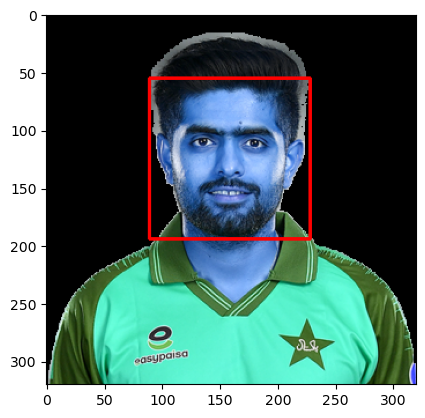

In [228]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

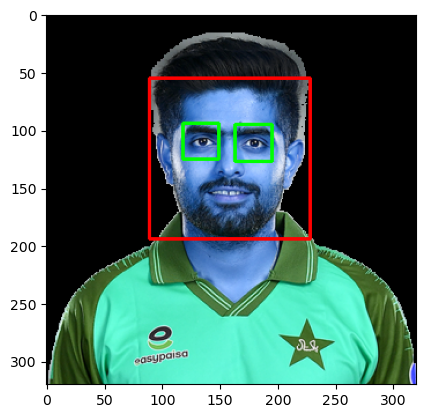

In [229]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

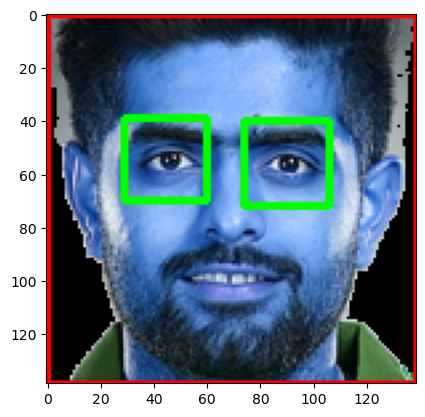

In [230]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [231]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

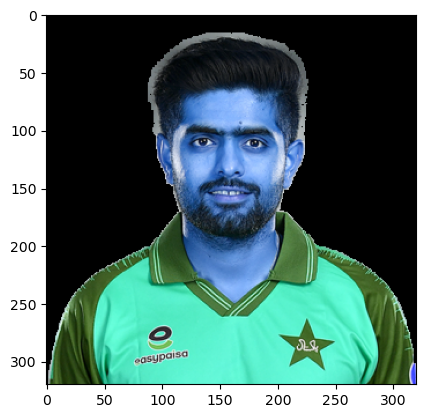

In [232]:
original_image = cv2.imread('./../images/babar_azam/320448.png')
plt.imshow(original_image)

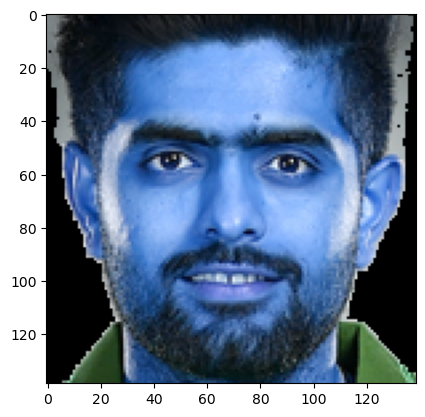

In [233]:
cropped_image = get_cropped_image_if_2_eyes('./../images/babar_azam/320448.png')
plt.imshow(cropped_image)

In [234]:
# org_image_obstructed = cv2.imread('./../images/babar_azam/_131732569_babarazam.jpg')
# plt.imshow(org_image_obstructed)

In [235]:
# cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./../images/babar_azam/_131732569_babarazam.jpg')

# # Check if the image was loaded properly (not None and not empty)
# if cropped_image_no_2_eyes is None or cropped_image_no_2_eyes.size == 0:
#     print("Error: Could not load or crop the image.")
#     exit()

# Continue processing the cropped image


    

# (3) Preprocessing: Use wavelet transform as a feature for traning our model

In [236]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

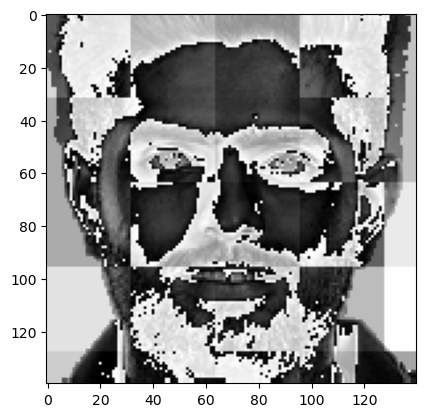

In [237]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [238]:
path_to_data = "./../images/"
path_to_cr_data = "dataset/cropped/"

In [239]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [240]:
img_dirs

['./../images/babar_azam',
 './../images/lionel_messi',
 './../images/maria_sharapova',
 './../images/roger_federer',
 './../images/Ronaldo',
 './../images/serena_williams',
 './../images/Shaid_Afridi',
 './../images/virat_kohli']

In [241]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [242]:
import os
import cv2

cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)  # Get the folder name as celebrity name
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []

    # Check if img_dir exists and contains files
    if not os.path.exists(img_dir):
        print(f"Directory {img_dir} does not exist.")
        continue

    for entry in os.scandir(img_dir):
        # Process only image files with valid extensions
        if entry.path.endswith(('.jpg', '.jpeg', '.png')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            
            if roi_color is not None:
                # Safely join paths
                cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
                
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder:", cropped_folder)
                
                cropped_file_name = f"{celebrity_name}{count}.png"
                cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
                
                # Save the cropped image
                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1


babar_azam
Generating cropped images in folder: dataset/cropped/babar_azam
lionel_messi
Generating cropped images in folder: dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder: dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder: dataset/cropped/roger_federer
Ronaldo
Generating cropped images in folder: dataset/cropped/Ronaldo
serena_williams
Generating cropped images in folder: dataset/cropped/serena_williams
Shaid_Afridi
Generating cropped images in folder: dataset/cropped/Shaid_Afridi
virat_kohli
Generating cropped images in folder: dataset/cropped/virat_kohli


# Now you should have cropped folder under datasets folder that contains cropped images
# Manually examine cropped folder and delete any unwanted images

In [243]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'babar_azam': ['dataset/cropped/babar_azam\\babar_azam1.png',
  'dataset/cropped/babar_azam\\babar_azam10.png',
  'dataset/cropped/babar_azam\\babar_azam11.png',
  'dataset/cropped/babar_azam\\babar_azam12.png',
  'dataset/cropped/babar_azam\\babar_azam13.png',
  'dataset/cropped/babar_azam\\babar_azam14.png',
  'dataset/cropped/babar_azam\\babar_azam2.png',
  'dataset/cropped/babar_azam\\babar_azam3.png',
  'dataset/cropped/babar_azam\\babar_azam4.png',
  'dataset/cropped/babar_azam\\babar_azam5.png',
  'dataset/cropped/babar_azam\\babar_azam6.png',
  'dataset/cropped/babar_azam\\babar_azam7.png',
  'dataset/cropped/babar_azam\\babar_azam8.png',
  'dataset/cropped/babar_azam\\babar_azam9.png'],
 'lionel_messi': ['dataset/cropped/lionel_messi\\lionel_messi1.png',
  'dataset/cropped/lionel_messi\\lionel_messi10.png',
  'dataset/cropped/lionel_messi\\lionel_messi11.png',
  'dataset/cropped/lionel_messi\\lionel_messi12.png',
  'dataset/cropped/lionel_messi\\lionel_messi13.png',
  'datase

In [244]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'babar_azam': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'Ronaldo': 4,
 'serena_williams': 5,
 'Shaid_Afridi': 6,
 'virat_kohli': 7}

In [245]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [246]:
# X is a list 
len(X[0])

4096

In [247]:
X[0]

array([[102],
       [ 99],
       [110],
       ...,
       [158],
       [125],
       [ 43]], dtype=uint8)

In [248]:
y[0]

0

In [249]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(208, 4096)

# Data cleaning process is done. Now we are ready to train our model

In [250]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6346153846153846

In [252]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      0.57      0.62         7
           2       0.62      0.83      0.71         6
           3       0.00      0.00      0.00         6
           4       0.71      0.91      0.80        11
           5       0.80      0.67      0.73         6
           6       1.00      0.75      0.86         4
           7       0.44      0.88      0.58         8

    accuracy                           0.63        52
   macro avg       0.53      0.58      0.54        52
weighted avg       0.55      0.63      0.57        52



c:\Users\SMZ\miniconda3\envs\image_classifer_Ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SMZ\miniconda3\envs\image_classifer_Ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SMZ\miniconda3\envs\image_classifer_Ml\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [253]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [254]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [255]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.666734,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.448790,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.730444,{'logisticregression__C': 5}


In [256]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [257]:
best_estimators['svm'].score(X_test,y_test)

0.8269230769230769

In [258]:
best_estimators['random_forest'].score(X_test,y_test)

0.5576923076923077

In [259]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7692307692307693

In [260]:
best_clf = best_estimators['svm']

In [261]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 4,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  6,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  3,  0,  2,  0,  0],
       [ 0,  1,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  5,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  3,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  6]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

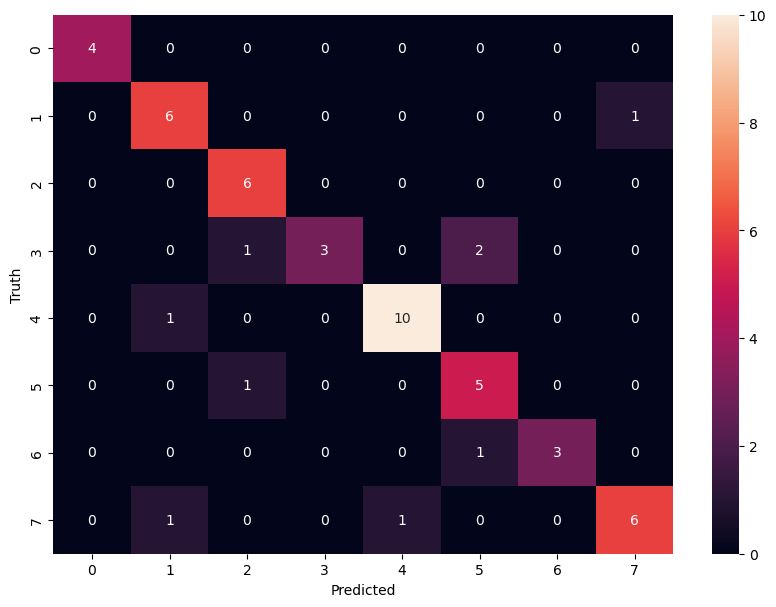

In [262]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [263]:
class_dict

{'babar_azam': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'Ronaldo': 4,
 'serena_williams': 5,
 'Shaid_Afridi': 6,
 'virat_kohli': 7}

In [264]:
# !pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [265]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))